<IPython.core.display.Javascript object>


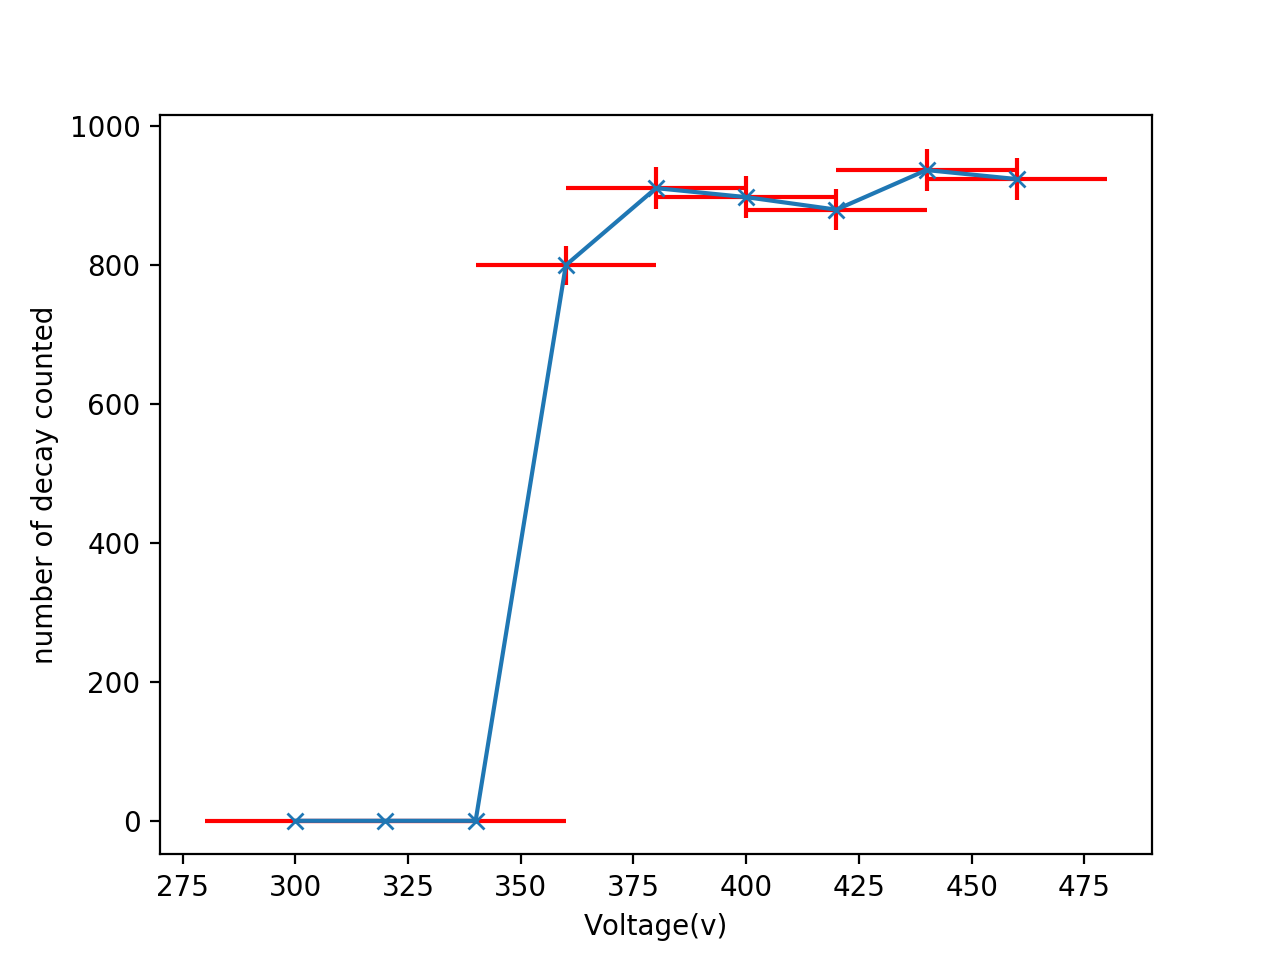

[ 0.          0.          0.         28.28427125 30.18277655 29.96664813
 29.66479395 30.61045573 30.39736831]


In [99]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

v=[300,320,340,360,380,400,420,440,460]

ve=[20,20,20,20,20,20,20,20,20]
c=[0,0,0,800,911,898,880,937,924]
ce=np.sqrt(np.array(c))


plt.errorbar(v, c, xerr=ve, yerr=ce, linestyle='None', marker='x',ecolor='r')
plt.xlabel('Voltage(v)')
plt.ylabel('number of decay counted')
plt.plot(v, c)


print(np.sqrt(c))
plt.show()

plt.savefig('past.jpg')


In [2]:
from numpy import *
import pylab
import pandas

colnames = ['A1', 'B1','C1','D1']
data = pandas.read_excel("data.xlsx",  names=colnames)
c10 = data.A1.tolist()
c1 = data.B1.tolist()
b10= data.C1.tolist()
b1= data.D1.tolist()


# C10

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

cc10=[0,0,0,0,0,0,0]


for i in range(len(c10)):
    if c10[i] <= 85.:
        cc10[0] += 1
    elif c10[i] <= 95.:
        cc10[1] += 1   
    elif c10[i] <= 105.:
        cc10[2] += 1
    elif c10[i] <= 115.:
        cc10[3] += 1
    elif c10[i] <= 125.:
        cc10[4] += 1
    elif c10[i] <= 135.:
        cc10[5] += 1
    elif c10[i] <= 145.:
        cc10[6] += 1
print(cc10)

[2, 16, 33, 24, 19, 4, 1]


Beta: [ 31.78969695 106.07290721  11.88288784]
Beta Std Error: [4.16763367 1.27158073 0.89269619]
Beta Covariance: [[17.2717408  -0.72702563 -2.18256672]
 [-0.72702563  1.6078477   0.23903782]
 [-2.18256672  0.23903782  0.79243637]]
Residual Variance: 1.0056409811856155
Inverse Condition #: 0.18946630003098255
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


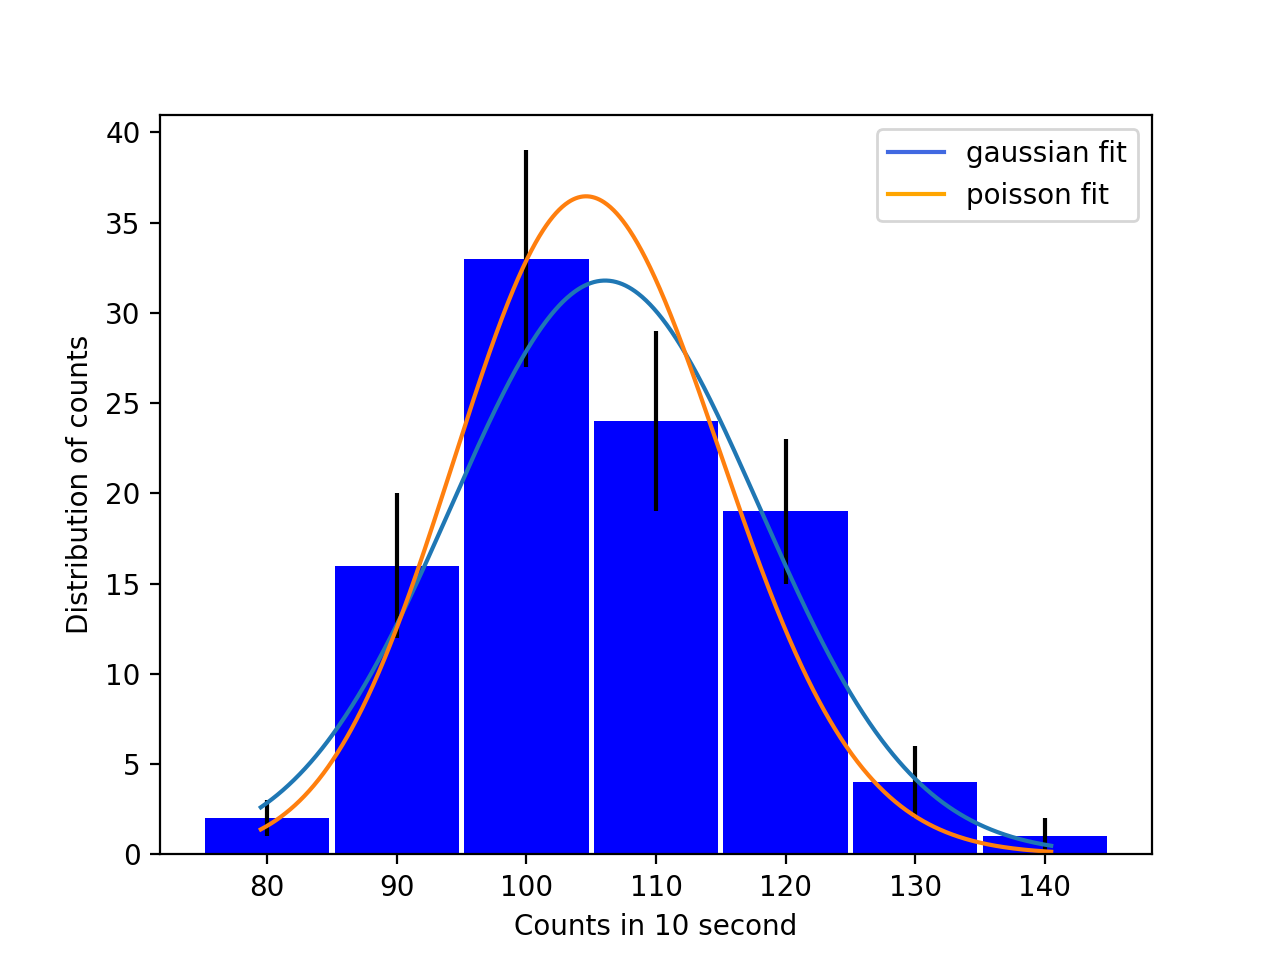

Beta: [936.50099744 105.10327395]
Beta Std Error: [118.26454525   1.38652841]
Beta Covariance: [[ 1.03477094e+04 -2.76307347e+00]
 [-2.76307347e+00  1.42230467e+00]]
Residual Variance: 1.3516520502990301
Inverse Condition #: 0.011853465537294569
Reason(s) for Halting:
  Sum of squares convergence
gauss chi2:  0.6296942489894854
poisson chi2:  1.0906255365629713


In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.special import factorial
import matplotlib.lines as mlines


er=list(np.array(cc10)**(1/2))
cc10er = np.round(np.array(er),0)


tt=[80,90,100,110,120,130,140]




def fit_func(p, x):
    a ,mu,sigma = p
    return a*np.exp(-(x-mu)**2/(2.*(sigma**2)))

linear = Model(fit_func)

data = RealData(tt, cc10, sy=cc10er)

odr= ODR(data, linear, beta0=[70., np.mean(c10) , np.std(c10)])

out = odr.run()

out.pprint()


x_fit = np.linspace(tt[0]-0.5, tt[-1]+0.5, 1000)
y_fit = fit_func(out.beta, x_fit)



plt.plot(x_fit, y_fit)


def fit_func1(p, x):
    a ,mu = p
    return a*((mu**x)*np.exp(-mu))/factorial(x, exact=False)

linear1 = Model(fit_func1)

data1 = RealData(tt, cc10, sy=cc10er)

odr1= ODR(data1, linear1, beta0=[70., np.mean(c10)])

out1 = odr1.run()

out1.pprint()


x_fit1 = np.linspace(tt[0]-0.5, tt[-1]+0.5, 1000)
y_fit1 = fit_func1(out1.beta, x_fit1)



plt.plot(x_fit1, y_fit1)



plt.bar(tt, cc10, width=9.6, align='center', color='blue',yerr=cc10er)
plt.xlabel('Counts in 10 second')
plt.ylabel('Distribution of counts')
data = mlines.Line2D([], [], color='royalblue', marker=',',markersize=15, label='gaussian fit')
data2 = mlines.Line2D([], [], color='orange', marker=',',markersize=15, label= 'poisson fit')
plt.legend(handles=[data,data2])
plt.show()

def funcg(x):
    return out.beta[0]*np.exp(-(x-out.beta[1])**2/(2.*(out.beta[2]**2)))
chi2g=0
for i in range(len(tt)):
    chi2g += ((funcg(tt[i])-cc10[i])/cc10er[i])**2

    
def funcp(x):
    return out1.beta[0]*((out1.beta[1]**x)*np.exp(-out1.beta[1]))/factorial(x, exact=False)
chi2p=0
for i in range(len(tt)):
    chi2p += ((funcp(tt[i])-cc10[i])/cc10er[i])**2
    

print('gauss chi2: ', chi2g/len(tt))   
print('poisson chi2: ', chi2p/len(tt))  

plt.savefig('padfvt.jpg')

# C1

In [102]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

cc1=[0,0,0,0,0,0,0,0,0]


for i in range(len(c10)):
    if c1[i] <= 3.:
        cc1[0] += 1
    elif c1[i] <= 5.:
        cc1[1] += 1   
    elif c1[i] <= 7.:
        cc1[2] += 1
    elif c1[i] <= 9.:
        cc1[3] += 1
    elif c1[i] <= 11.:
        cc1[4] += 1
    elif c1[i] <= 13.:
        cc1[5] += 1
    elif c1[i] <= 15.:
        cc1[6] += 1
    elif c1[i] <= 17.:
        cc1[7] += 1
    elif c1[i] <= 19.:
        cc1[8] += 1


Beta: [23.80902872  9.99701059  3.38095624]
Beta Std Error: [2.63576845 0.3693258  0.25459089]
Beta Covariance: [[ 1.18069691e+01 -7.71195904e-02 -5.85832619e-01]
 [-7.71195904e-02  2.31815891e-01 -1.94924502e-03]
 [-5.85832619e-01 -1.94924502e-03  1.10156374e-01]]
Residual Variance: 0.5884046292312318
Inverse Condition #: 0.45188564597372644
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


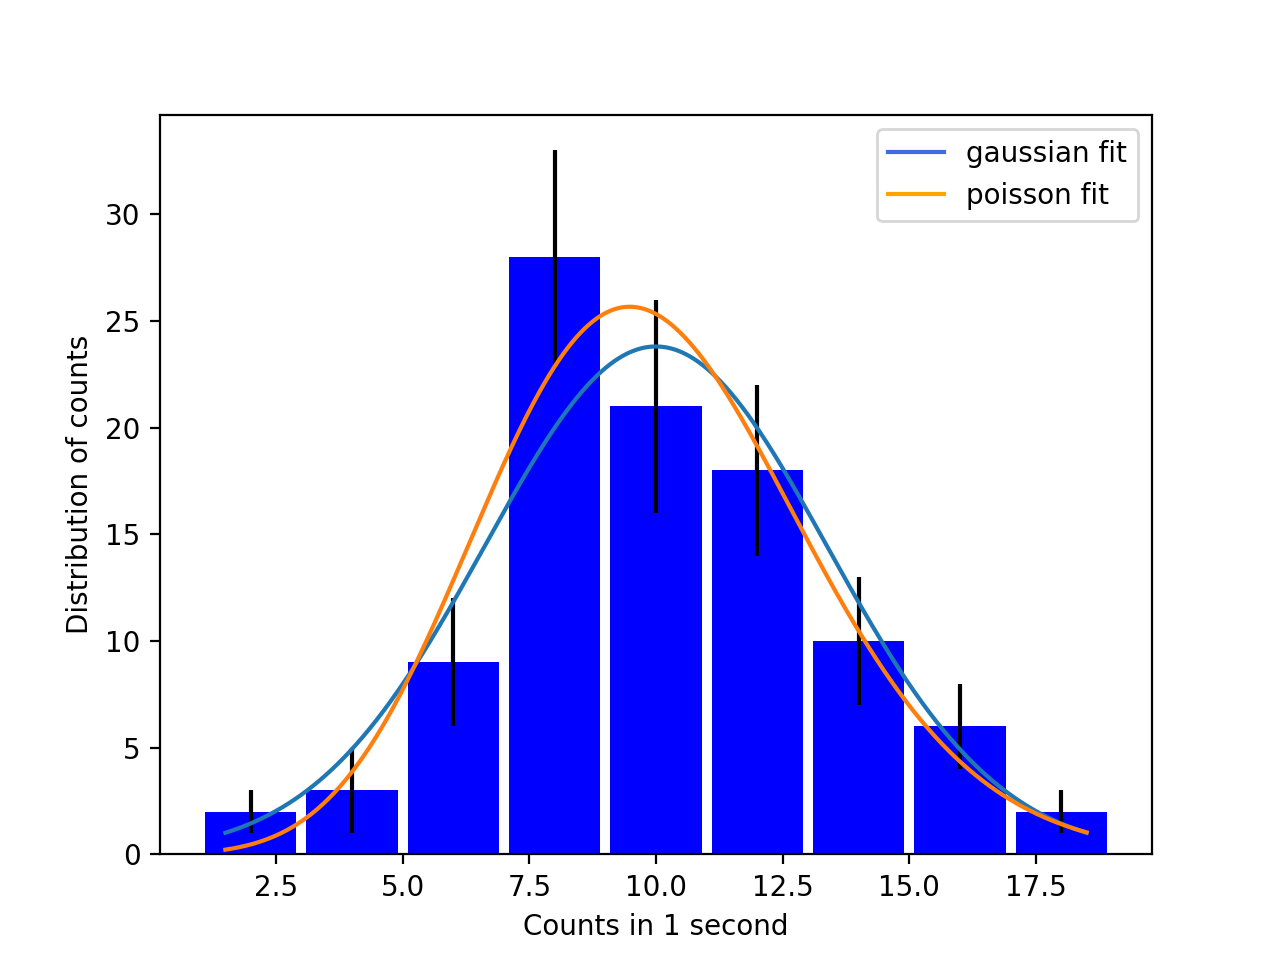

Beta: [202.47162005   9.98338013]
Beta Std Error: [18.50660856  0.33590022]
Beta Covariance: [[ 6.71337187e+02 -1.50123532e+00]
 [-1.50123532e+00  2.21160515e-01]]
Residual Variance: 0.5101677174222896
Inverse Condition #: 0.018288895296899713
Reason(s) for Halting:
  Sum of squares convergence
gauss chi2:  0.6908804557542427
poisson chi2:  0.7908661111417369


In [103]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.special import factorial

er=list(np.array(cc1)**(1/2))
cc1er = np.round(np.array(er),0)


tt=[2,4,6,8,10,12,14,16,18]




def fit_func(p, x):
    a ,mu,sigma = p
    return a*np.exp(-(x-mu)**2/(2.*(sigma**2)))

linear = Model(fit_func)

data = RealData(tt, cc1, sy=cc1er)

odr= ODR(data, linear, beta0=[70., np.mean(c1) , np.std(c1)])

out = odr.run()

out.pprint()


x_fit = np.linspace(tt[0]-0.5, tt[-1]+0.5, 1000)
y_fit = fit_func(out.beta, x_fit)



plt.plot(x_fit, y_fit)


def fit_func1(p, x):
    a ,mu = p
    return a*((mu**x)*np.exp(-mu))/factorial(x, exact=False)

linear1 = Model(fit_func1)

data1 = RealData(tt, cc1, sy=cc1er)

odr1= ODR(data1, linear1, beta0=[70., np.mean(c1)])

out1 = odr1.run()

out1.pprint()

#x_fit1 = tt
x_fit1 = np.linspace(tt[0]-0.5, tt[-1]+0.5, 1000)
y_fit1 = fit_func1(out1.beta, x_fit1)



plt.plot(x_fit1, y_fit1)



plt.bar(tt, cc1, width=1.8, align='center', color='blue',yerr=cc1er)
plt.xlabel('Counts in 1 second')
plt.ylabel('Distribution of counts')
data = mlines.Line2D([], [], color='royalblue', marker=',',markersize=15, label='gaussian fit')
data2 = mlines.Line2D([], [], color='orange', marker=',',markersize=15, label= 'poisson fit')
plt.legend(handles=[data,data2])
plt.show()


def funcg(x):
    return out.beta[0]*np.exp(-(x-out.beta[1])**2/(2.*(out.beta[2]**2)))
chi2g=0
for i in range(len(tt)):
    chi2g += ((funcg(tt[i])-cc1[i])/cc1er[i])**2

    
def funcp(x):
    return out1.beta[0]*((out1.beta[1]**x)*np.exp(-out1.beta[1]))/factorial(x, exact=False)
chi2p=0
for i in range(len(tt)):
    chi2p += ((funcp(tt[i])-cc1[i])/cc1er[i])**2
    

print('gauss chi2: ', chi2g/len(tt))   
print('poisson chi2: ', chi2p/len(tt)) 

plt.savefig('pavsdfvst.jpg')

# b10

In [104]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

bb10=[0,0,0,0]


for i in range(len(b10)):
    if b10[i] <= 55.:
        bb10[0] += 1   
    elif b10[i] <= 65.:
        bb10[1] += 1
    elif b10[i] <= 75.:
        bb10[2] += 1
    elif b10[i] <= 85.:
        bb10[3] += 1




Beta: [42.68409353 59.29718805  9.82716586]
Beta Std Error: [3.14070592 0.86825154 0.71647147]
Beta Covariance: [[28.19497861  1.46974873 -3.62144346]
 [ 1.46974873  2.15480685 -0.88334536]
 [-3.62144346 -0.88334536  1.46728686]]
Residual Variance: 0.3498507234784025
Inverse Condition #: 0.1818427594663406
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


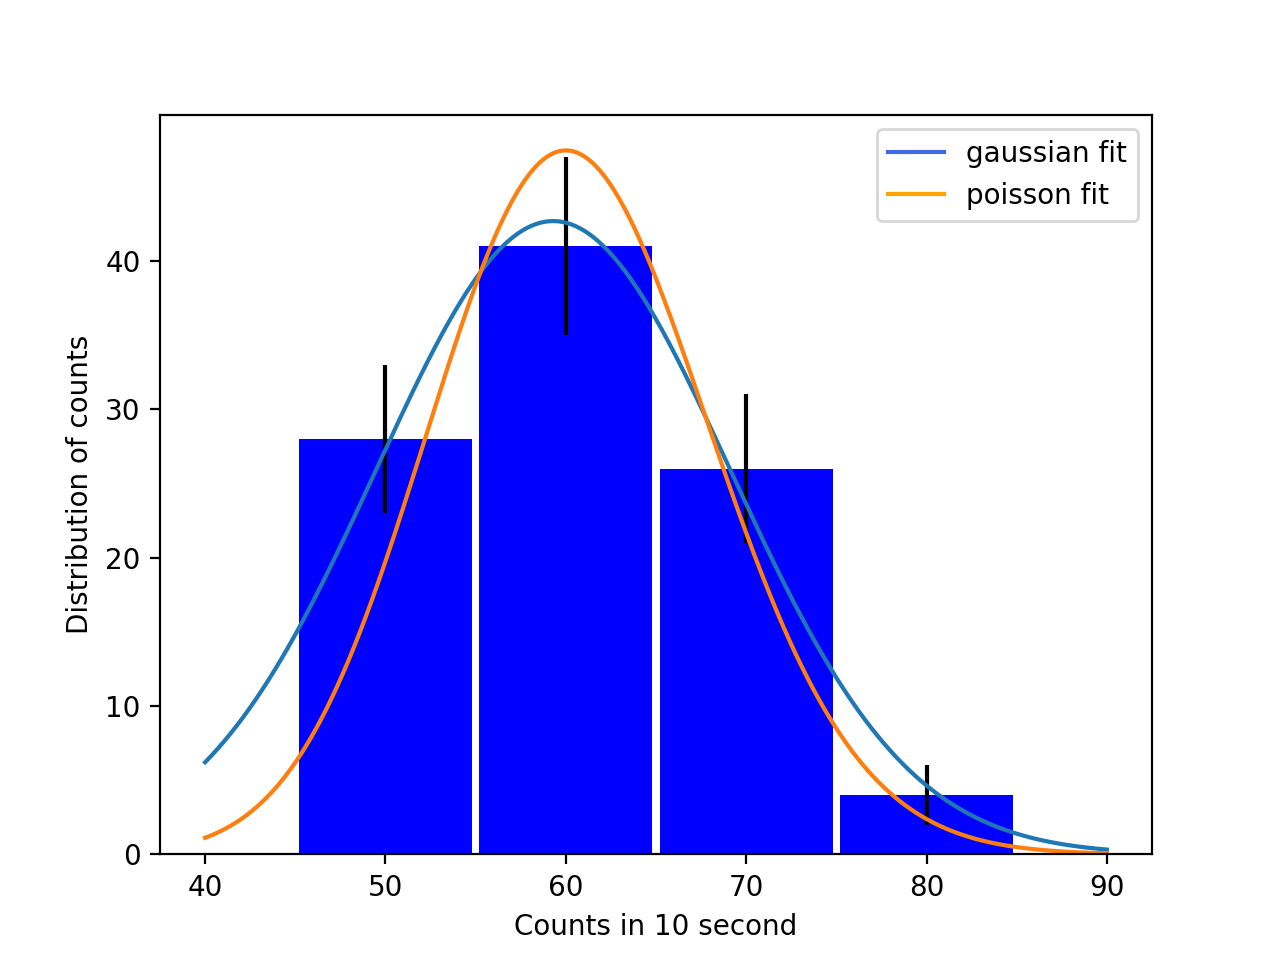

Beta: [924.48318752  60.50368241]
Beta Std Error: [137.01778737   1.56857097]
Beta Covariance: [[ 9.32071388e+03 -1.37441718e-01]
 [-1.37441718e-01  1.22152856e+00]]
Residual Variance: 2.0142098885652393
Inverse Condition #: 0.011577292481388468
Reason(s) for Halting:
  Sum of squares convergence
gauss chi2:  0.10612941043019593
poisson chi2:  1.3207993860833331


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in power
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in multiply


In [105]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.special import factorial

er=list(np.array(bb10)**(1/2))
bb10er = np.round(np.array(er),0)


tt=[50,60,70,80]




def fit_func(p, x):
    a ,mu,sigma = p
    return a*np.exp(-(x-mu)**2/(2.*(sigma**2)))

linear = Model(fit_func)

data = RealData(tt, bb10, sy=bb10er)

odr= ODR(data, linear, beta0=[70., np.mean(b10) , np.std(b10)])

out = odr.run()

out.pprint()


x_fit = np.linspace(tt[0]-10., tt[-1]+10., 1000)
y_fit = fit_func(out.beta, x_fit)



plt.plot(x_fit, y_fit)


def fit_func1(p, x):
    a ,mu = p
    return a*((mu**x)*np.exp(-mu))/factorial(x, exact=False)

linear1 = Model(fit_func1)

data1 = RealData(tt,bb10, sy=bb10er)

odr1= ODR(data1, linear1, beta0=[70., np.mean(bb10)])

out1 = odr1.run()

out1.pprint()

#x_fit1 = tt
x_fit1 = np.linspace(tt[0]-10., tt[-1]+10., 1000)
y_fit1 = fit_func1(out1.beta, x_fit1)



plt.plot(x_fit1, y_fit1)



plt.bar(tt, bb10, width=9.6, align='center', color='blue',yerr=bb10er)
plt.xlabel('Counts in 10 second')
plt.ylabel('Distribution of counts')
data = mlines.Line2D([], [], color='royalblue', marker=',',markersize=15, label='gaussian fit')
data2 = mlines.Line2D([], [], color='orange', marker=',',markersize=15, label= 'poisson fit')
plt.legend(handles=[data,data2])
plt.show()

def funcg(x):
    return out.beta[0]*np.exp(-(x-out.beta[1])**2/(2.*(out.beta[2]**2)))
chi2g=0
for i in range(len(tt)):
    chi2g += ((funcg(tt[i])-bb10[i])/bb10er[i])**2

    
def funcp(x):
    return out1.beta[0]*((out1.beta[1]**x)*np.exp(-out1.beta[1]))/factorial(x, exact=False)
chi2p=0
for i in range(len(tt)):
    chi2p += ((funcp(tt[i])-bb10[i])/bb10er[i])**2
    

print('gauss chi2: ', chi2g/len(tt))   
print('poisson chi2: ', chi2p/len(tt)) 

plt.savefig('pcsdcsast.jpg')

# b1

In [106]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

bb1=[0,0,0,0,0,0]


for i in range(len(b1)):
    if b1[i] <= 1.:
        bb1[0] += 1
    elif b1[i] <= 3.:
        bb1[1] += 1   
    elif b1[i] <= 5.:
        bb1[2] += 1
    elif b1[i] <= 7.:
        bb1[3] += 1
    elif b1[i] <= 9.:
        bb1[4] += 1
    elif b1[i] <= 11.:
        bb1[5] += 1



Beta: [30.5072527   5.62949438  2.54321853]
Beta Std Error: [1.37084024 0.15386665 0.11508745]
Beta Covariance: [[22.37803326 -0.38683938 -0.88865504]
 [-0.38683938  0.28192737  0.05719774]
 [-0.88865504  0.05719774  0.15772632]]
Residual Variance: 0.08397534051849966
Inverse Condition #: 0.3720873530498249
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


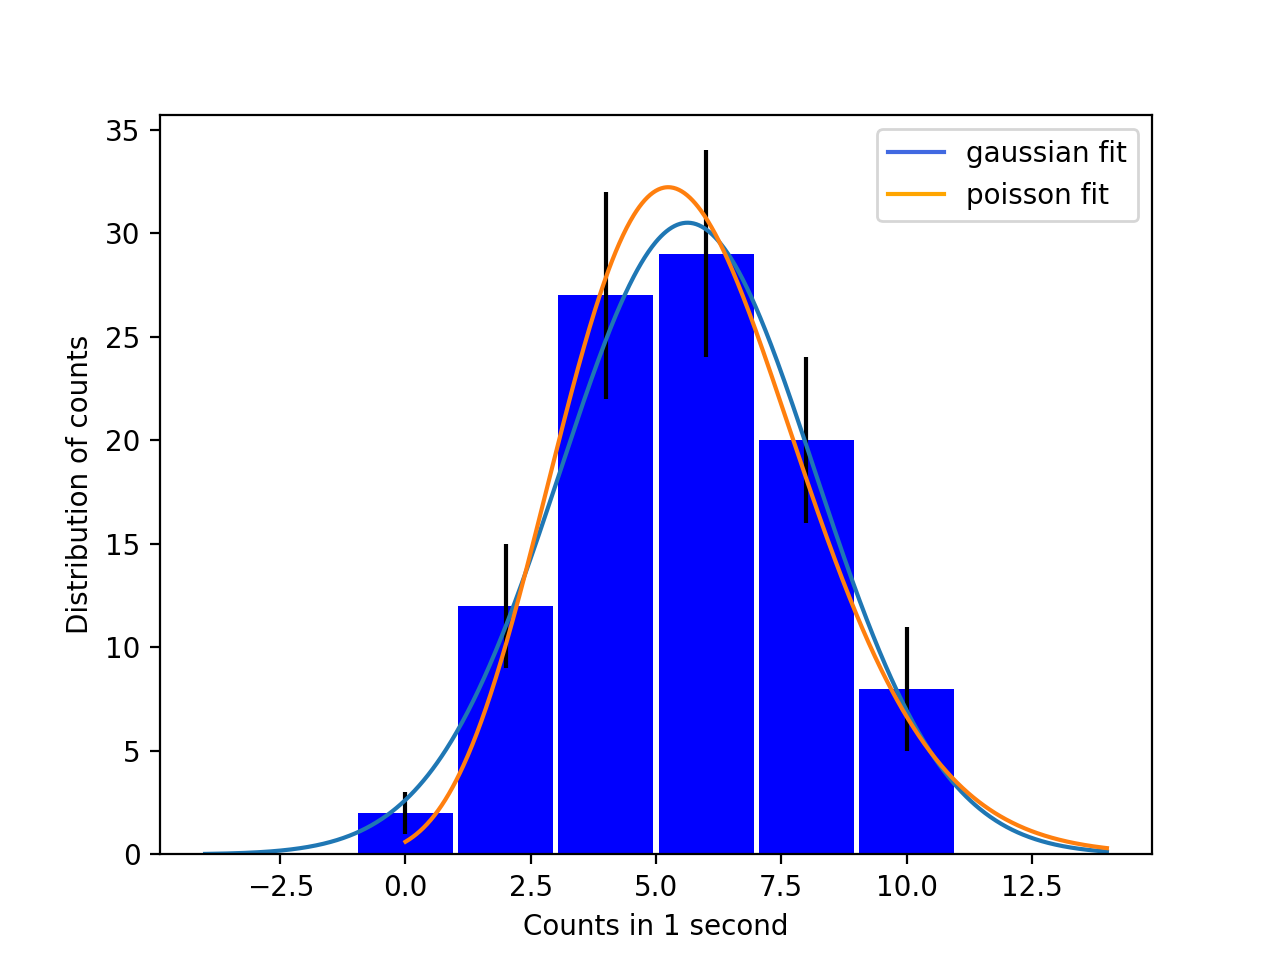

Beta: [192.29546492   5.75079579]
Beta Std Error: [11.73594101  0.1989526 ]
Beta Covariance: [[ 9.44763920e+02 -6.69574456e-01]
 [-6.69574456e-01  2.71510543e-01]]
Residual Variance: 0.14578489760878724
Inverse Condition #: 0.01720714983778434
Reason(s) for Halting:
  Sum of squares convergence
gauss chi2:  0.14520951133841145
poisson chi2:  0.4808903994152672


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


In [107]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.special import factorial

er=list(np.array(bb1)**(1/2))
bb1er = np.round(np.array(er),0)


tt=[0,2,4,6,8,10]




def fit_func(p, x):
    a ,mu,sigma = p
    return a*np.exp(-(x-mu)**2/(2.*(sigma**2)))

linear = Model(fit_func)

data = RealData(tt, bb1, sy=bb1er)

odr= ODR(data, linear, beta0=[70., np.mean(b1) , np.std(b1)])

out = odr.run()

out.pprint()


x_fit = np.linspace(tt[0]-4., tt[-1]+4., 1000)
y_fit = fit_func(out.beta, x_fit)



plt.plot(x_fit, y_fit)


def fit_func1(p, x):
    a ,mu = p
    return a*((mu**x)*np.exp(-mu))/factorial(x, exact=False)

linear1 = Model(fit_func1)

data1 = RealData(tt,bb1, sy=bb1er)

odr1= ODR(data1, linear1, beta0=[70., np.mean(bb1)])

out1 = odr1.run()

out1.pprint()


x_fit1 = np.linspace(tt[0]-4., tt[-1]+4., 1000)
y_fit1 = fit_func1(out1.beta, x_fit1)



plt.plot(x_fit1, y_fit1)



plt.bar(tt, bb1, width=1.9, align='center', color='blue',yerr=bb1er)
plt.xlabel('Counts in 1 second')
plt.ylabel('Distribution of counts')
data = mlines.Line2D([], [], color='royalblue', marker=',',markersize=15, label='gaussian fit')
data2 = mlines.Line2D([], [], color='orange', marker=',',markersize=15, label= 'poisson fit')
plt.legend(handles=[data,data2])
plt.show()

def funcg(x):
    return out.beta[0]*np.exp(-(x-out.beta[1])**2/(2.*(out.beta[2]**2)))
chi2g=0
for i in range(len(tt)):
    chi2g += ((funcg(tt[i])-bb1[i])/bb1er[i])**2

    
def funcp(x):
    return out1.beta[0]*((out1.beta[1]**x)*np.exp(-out1.beta[1]))/factorial(x, exact=False)
chi2p=0
for i in range(len(tt)):
    chi2p += ((funcp(tt[i])-bb1[i])/bb1er[i])**2
    

print('gauss chi2: ', chi2g/len(tt))   
print('poisson chi2: ', chi2p/len(tt)) 

plt.savefig('pacsdst.jpg')

In [111]:
t=[0,3.5,3.8,4.5,6.0,6.5,7.4,8.1,9.2,10.1,10.6,11.2,11.9,12.7,14.0,14.2,15.4,16.0,17.7,17.9,19.1,20.4,21.5,21.9,22.5,22.9,23.6,24.6,25.9,27.8,28.3,29.7,30.3,31.2,32.2,32.6,34.4,35.6,35.7,36.1,36.3,36.5,37.4,39.0,42.0,43.2,44.5,46.0,47.3,48.9,49.5,50.0,50.4,51.5,51.7,52.5,53.1,54.5,55.4,56.6,57.0,59.1,62.2,62.9,63.6,63.8,64.1,66.2,67.1,70.4,70.8,71.4,72.5,72.9,73.7,74.1,75.3,75.5,75.8,77.3,79.2,80.2,83.0,83.6,83.7,83.8,84.4,85.6,86.4,87.0,88.0,88.4,88.8,89.5,90.0,90.9,92.0,92.2,93.9,95.2,96.0,97.2,97.4,99.1,99.5,100.1,100.2,100.8,101.2,102.1,103.0,103.2,104.0,107.3,108.3,108.9,109.2,110.1,110.5,110.7,111.2,111.6,112.2,114.6]
tn0=[]
for i in range(len(t)-1):
    tn0.append(round(t[i+1]-t[i],2))

tn1=[]
for i in range(len(t)-2):
    tn1.append(round(t[i+2]-t[i],2))

In [108]:
tnn0=[0,0,0,0]

for i in range(len(t)-1):
    if tn0[i] <= 1.:
        tnn0[0] += 1
    elif tn0[i] <= 2.:
        tnn0[1] += 1   
    elif tn0[i] <= 3.:
        tnn0[2] += 1
    elif tn0[i] <= 4.:
        tnn0[3] += 1
    
print(tnn0)

[82, 32, 5, 4]


Beta: [156.97727733   1.17290441]
Beta Std Error: [77.06457836  0.22183237]
Beta Covariance: [[3.81238342e+04 9.56372070e+01]
 [9.56372070e+01 3.15890671e-01]]
Residual Variance: 0.15578048124675473
Inverse Condition #: 0.00014115350168311804
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


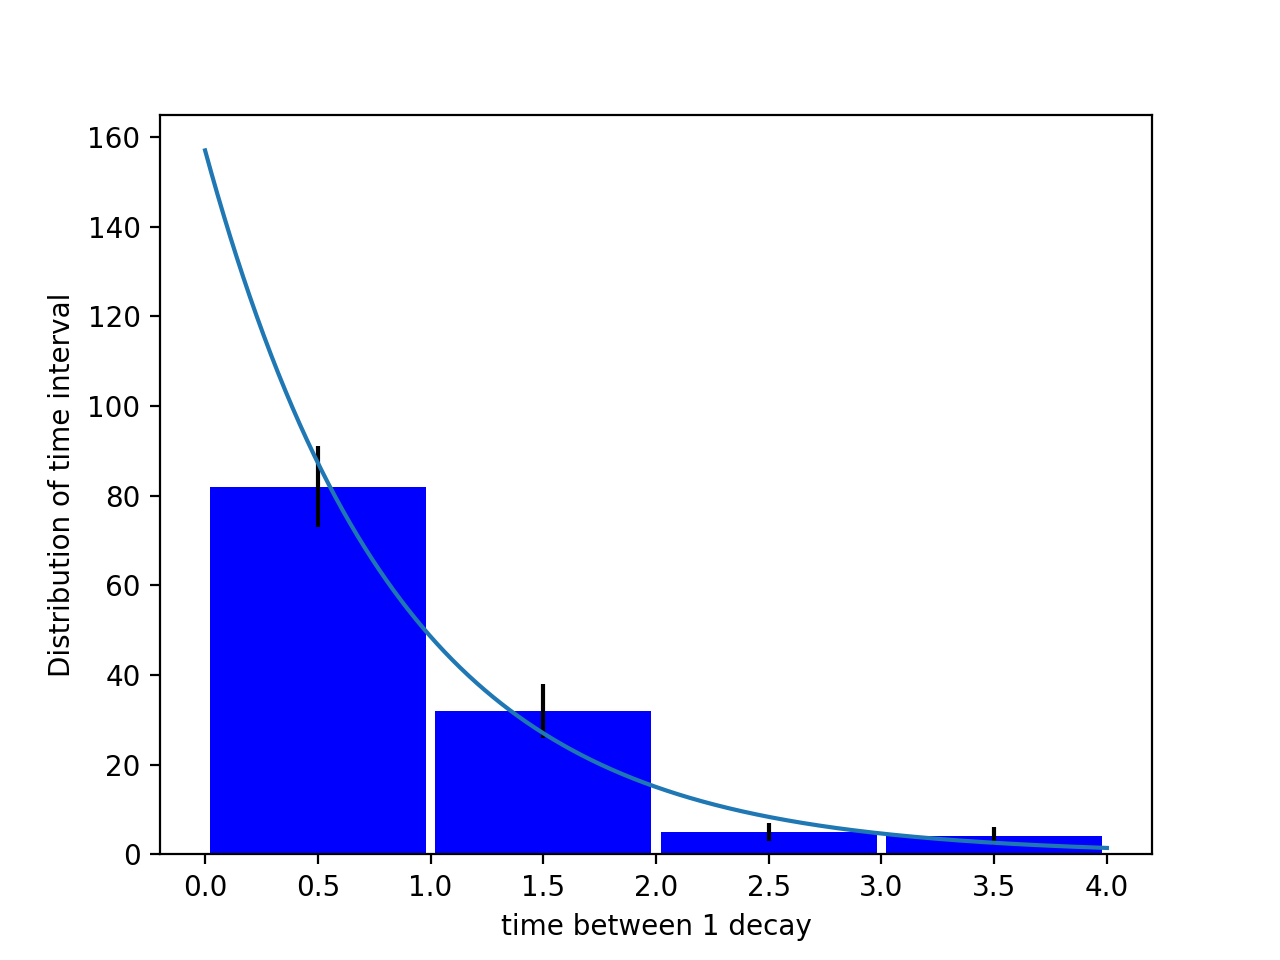

poisson chi2:  1.0909916554487624


In [109]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

er=list(np.array(tnn0)**(1/2))
tn0er = np.round(np.array(er),0)


tt=[0.5,1.5,2.5,3.5]




def fit_func(p, t):
    a ,alpha = p
    return a*(np.exp(-alpha*t))

linear = Model(fit_func)

data = RealData(tt, tnn0, sy=tn0er)

odr= ODR(data, linear, beta0=[0., 1.])

out = odr.run()

out.pprint()

x_fit = np.linspace(tt[0]-0.5, tt[-1]+0.5, 1000)
y_fit = fit_func(out.beta, x_fit)



plt.plot(x_fit, y_fit)



plt.bar(tt, tnn0, width=0.96, align='center', color='blue',yerr=tn0er)
plt.xlabel('time between 1 decay')
plt.ylabel('Distribution of time interval')
plt.show()


def funcp(t):
    return out.beta[0]*(np.exp(-out.beta[1]*t))
chi2p=0
for i in range(len(tt)):
    chi2p += ((funcp(tt[i])-tnn0[i])/tn0er[i])**2
     
print('poisson chi2: ', chi2p/len(tt)) 

plt.savefig('pacddst.jpg')

In [50]:
tnn1=[0,0,0,0,0,0]

for i in range(len(t)-2):
    if tn1[i] <= 1.:
        tnn1[0] += 1
    elif tn1[i] <= 2.:
        tnn1[1] += 1   
    elif tn1[i] <= 3.:
        tnn1[2] += 1
    elif tn1[i] <= 4.:
        tnn1[3] += 1
    elif tn1[i] <= 5.:
        tnn1[4] += 1
    elif tn1[i] <= 6.:
        tnn1[5] += 1
    
print(tnn1)

[26, 58, 25, 7, 5, 1]


Beta: [200.84986723   1.29843105]
Beta Std Error: [42.77177361  0.09135313]
Beta Covariance: [[2.03956418e+04 3.54264621e+01]
 [3.54264621e+01 9.30400096e-02]]
Residual Variance: 0.08969683993644309
Inverse Condition #: 0.11580833175496215
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


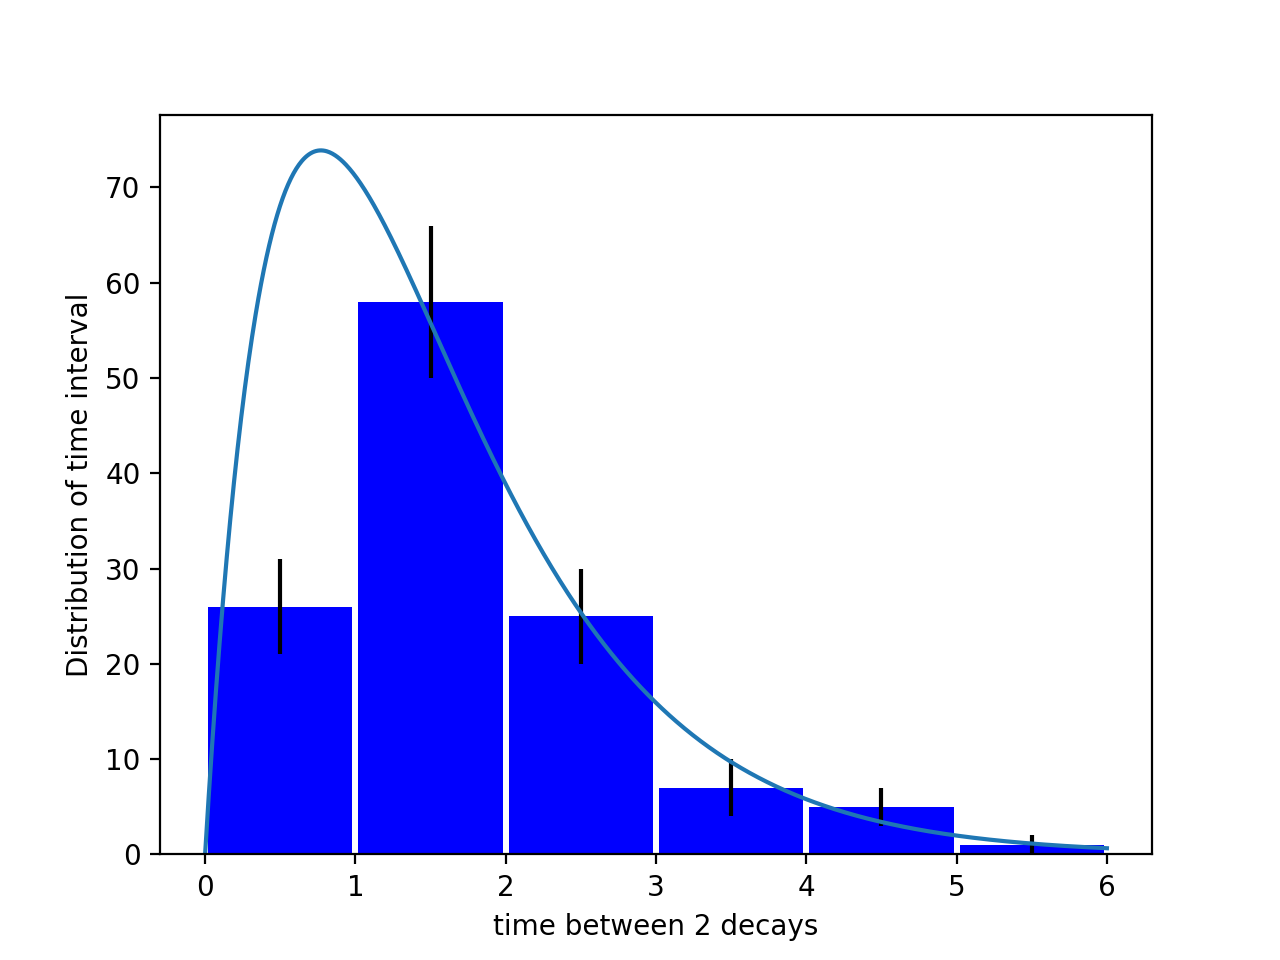

poisson chi2:  12.088191427626704


In [110]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

er=list(np.array(tnn1)**(1/2))
tn1er = np.round(np.array(er),0)

tt=[0.5,1.5,2.5,3.5,4.5,5.5]



def fit_func(p, t):
    a ,alpha = p
    return a*(np.exp(-alpha*t))*alpha*t

linear = Model(fit_func)

data = RealData(tt, tnn1, sy=tn1er)

odr= ODR(data, linear, beta0=[100., 1.])

out = odr.run()

out.pprint()

x_fit = np.linspace(tt[0]-0.5, tt[-1]+0.5, 1000)
y_fit = fit_func(out.beta, x_fit)



plt.plot(x_fit, y_fit)



plt.bar(tt, tnn1, width=0.96, align='center', color='blue',yerr=tn1er)
plt.xlabel('time between 2 decays')
plt.ylabel('Distribution of time interval')
plt.show()


def funcp(t):
    return out.beta[0]*(np.exp(-out.beta[1]*t))*out.beta[1]*t
chi2p=0
for i in range(len(tt)):
    chi2p += ((funcp(tt[i])-tnn1[i])/tn1er[i])**2
     
print('poisson chi2: ', chi2p/len(tt)) 
plt.savefig('padvst.jpg')